In [53]:
import numpy as np
import pandas as pd
import requests


from bs4 import BeautifulSoup   #used for web scraping

In [54]:
import requests
import urllib3
import ssl


class CustomHttpAdapter (requests.adapters.HTTPAdapter):
    # "Transport adapter" that allows us to use custom ssl_context.

    def __init__(self, ssl_context=None, **kwargs):
        self.ssl_context = ssl_context
        super().__init__(**kwargs)

    def init_poolmanager(self, connections, maxsize, block=False):
        self.poolmanager = urllib3.poolmanager.PoolManager(
            num_pools=connections, maxsize=maxsize,
            block=block, ssl_context=self.ssl_context)


def get_legacy_session():
    ctx = ssl.create_default_context(ssl.Purpose.SERVER_AUTH)
    ctx.options |= 0x4  # OP_LEGACY_SERVER_CONNECT
    session = requests.session()
    session.mount('https://', CustomHttpAdapter(ctx))
    return session

In [21]:
get_legacy_session().get("https://tools.niehs.nih.gov/stdb/index.cfm?do=spintrap.search&radical=OH&search=true&spintrap=DMPO&page=1")

<Response [200]>

In [22]:
response=get_legacy_session().get("https://tools.niehs.nih.gov/stdb/index.cfm?do=spintrap.search&radical=OH&search=true&spintrap=DMPO&page=1").text

'\n\t\t<!doctype html>\n\t\t<html class="no-js" lang="en">\n\t\t\t<head>\n\t\t\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n\t\t\t\t<!-- ~~~Beginning of header meta (DO NOT DELETE)~~~-->\n    \n\n<link rel="canonical" href="https://www.niehs.nih.gov/health/topics/population" />\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<link rel="icon" href="https://www.niehs.nih.gov/themes/custom/niehs_cms/favicon.ico" type="image/vnd.microsoft.icon" />\n<script src="https://www.niehs.nih.gov/sites/default/files/google_tag/gtm_m2b8czj/google_tag.script.js?sa1uum" defer></script>\n\n<!-- ~~~End of header meta (DO NOT DELETE)~~~-->\n\t\t\t\t<meta name="Description" content="Spin Trap Databases"/>\n\t\t\t\t<meta name="Keywords" content="Alcoholism, Cancer, Cardiovascular diseases, Diabetes, Environmental lung diseases, Biochemistry, Chemistry, Medical sciences, Pharmacology, Physics, Computational chemistry, Enzymology, Medicinal chemistry, Photobiology, Structural biology, Alcohol, Lead, Me
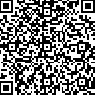

In [23]:
response

In [24]:
soup=BeautifulSoup(response,'lxml')  # create object, lxml helps in parsing the html file

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- ~~~Beginning of header meta (DO NOT DELETE)~~~-->
  <link href="https://www.niehs.nih.gov/health/topics/population" rel="canonical"/>
  <link href="https://www.niehs.nih.gov/themes/custom/niehs_cms/favicon.ico" rel="icon" type="image/vnd.microsoft.icon"/>
  <script defer="" src="https://www.niehs.nih.gov/sites/default/files/google_tag/gtm_m2b8czj/google_tag.script.js?sa1uum">
  </script>
  <!-- ~~~End of header meta (DO NOT DELETE)~~~-->
  <meta content="Spin Trap Databases" name="Description"/>
  <meta content="Alcoholism, Cancer, Cardiovascular diseases, Diabetes, Environmental lung diseases, Biochemistry, Chemistry, Medical sciences, Pharmacology, Physics, Computational chemistry, Enzymology, Medicinal chemistry, Photobiology, Structural biology, Alcohol, Lead, Metals, Smoking, UV radiation, Cardiovascular system, Kidney, bladder, Liver, Lungs tract, Respiratory tra
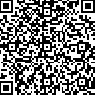

In [25]:
print(soup.prettify())  #to easily understand html structure

In [26]:
#extract h1 tags
soup.find_all('h1')[0].text.strip()

'National Institute of Environmental Health Sciences'

In [27]:
for i in soup.find_all('h2'):
    print(i.text.strip())

Main navigation
Health & Education
Research
Funding Opportunities
Careers & Training
News & Events
About NIEHS
Your Environment. Your Health.
Spin Trap Database
National Institute ofEnvironmental Health Sciences


In [28]:
table=soup.find_all('table', class_='dataTable ui-responsive ui-table large-only')  # use class 

In [29]:
# Iterate over elements in the table
for table_element in table:
    # Apply find() method to each element
    tbody = table_element.find('tbody')
    # Process the found tbody element
    
    
    if tbody:
        # Do something with the tbody element
        print(tbody)


<tbody>
<tr>
<td>
<a href="/stdb/index.cfm?do=spintrap.details&amp;refid=838"><strong>DMPO * .C(OH)(C6H5)(CH3)2 ?</strong> in AQ03Z0</a>
</td>
<td nowrap="nowrap" valign="top">
					aN = 16 G
				</td>
<td nowrap="nowrap" valign="top">
					aH = 22.3 G
				</td>
<td>     0.72</td>
<td>DMHB + ligninase</td>
</tr>
<tr class="highlight">
<td>
<a href="/stdb/index.cfm?do=spintrap.details&amp;refid=424"><strong>DMPO * .C(OH)(CH3)2</strong> in AC</a>
</td>
<td nowrap="nowrap" valign="top">
					aN = 14.5 G
				</td>
<td nowrap="nowrap" valign="top">
					aH = 24.8 G
				</td>
<td>     0.58</td>
<td>gamma hv</td>
</tr>
<tr>
<td>
<a href="/stdb/index.cfm?do=spintrap.details&amp;refid=816"><strong>DMPO * .C(OH)(CH3)2</strong> in AQ AC PR</a>
</td>
<td nowrap="nowrap" valign="top">
					aN = 15.4 G
				</td>
<td nowrap="nowrap" valign="top">
					aH = 24.3 G
				</td>
<td>     0.63</td>
<td>acetone + propanol + hv</td>
</tr>
<tr class="highlight">
<td>
<a href="/stdb/index.cfm?do=spintrap.detail

In [57]:
# Initialize lists to store extracted data
all_rows_data = []

# Iterate over each page
for page_num in range(1, 19):
    # Make a request to the page
    url = f"https://tools.niehs.nih.gov/stdb/index.cfm?do=spintrap.search&radical=OH&search=true&spintrap=DMPO&page={page_num}"  # Replace with the actual URL pattern
    response=get_legacy_session().get(url)
    
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the tbody element containing the data
        tbody = soup.find('tbody')
        if tbody:
            # Extract information from each row (tr) within the tbody
            rows = tbody.find_all('tr')
            for row in rows:
                # Initialize a dictionary to store data of each row
                row_data = {}
                
                # Extract information from each cell (td) within the row
                cells = row.find_all('td')
                
                # Extract and store data from each cell
                for index, cell in enumerate(cells):
                    # Assuming index 0 contains the first column data, index 1 contains the second column data, and so on
                    if index == 0:
                        # Split the cell content to extract the spin trap and comments
                        cell_text = cell.get_text(strip=True)
                        #split_text = cell_text.split(' in ')
                        row_data['Spin Trap with comments'] = cell_text
                        #row_data['Comments'] = split_text[1]
                    elif index == 1:
                        # Extract and store aN value
                        aN_text = cell.get_text(strip=True)
                        if 'N/A' in aN_text:
                            row_data['aN'] = None
                        else:
                            row_data['aN'] = float(aN_text.split('=')[1].split('G')[0])
                    elif index == 2:
                        # Extract and store aH value
                        aH_text = cell.get_text(strip=True)
                        if 'N/A' in aH_text:
                            row_data['aH'] = None
                        else:
                            row_data['aH'] = float(aH_text.split('=')[1].split('G')[0])
                    elif index == 3:
                        # Extract and store the aN/aH value
                        aN_aH_text = cell.get_text(strip=True)
                        if 'N/A' in aN_aH_text:
                            row_data['aN/aH'] = None
                        else:
                            row_data['aN/aH'] = float(aN_aH_text)
                    elif index == 4:
                        # Extract and store comments
                        row_data['Comments'] = cell.get_text(strip=True)
                # Add the "Result" column with value "OH"
                row_data['Spin Trap'] = "OH"
                # Append the data of the current row to the list of rows data
                all_rows_data.append(row_data)
    else:
        print(f"Failed to fetch page {page_num}")

# Create a DataFrame from the extracted data
df = pd.DataFrame(all_rows_data)

# Print the DataFrame
print(df)


                  Spin Trap with comments     aN     aH  aN/aH  \
0    DMPO * .C(OH)(C6H5)(CH3)2 ?in AQ03Z0  16.00  22.30   0.72   
1                DMPO * .C(OH)(CH3)2in AC  14.50  24.80   0.58   
2          DMPO * .C(OH)(CH3)2in AQ AC PR  15.40  24.30   0.63   
3           DMPO * .C(OH)(CH3)2in AQ PR i  15.90  23.50   0.68   
4               DMPO * .C(OH)(CH3)2in AQ0  15.92  23.66   0.67   
..                                    ...    ...    ...    ...   
433                   DMPO * .OHin AQ07P8  15.00  15.00   1.00   
434                   DMPO * .OHin AQ07P8  15.00  15.00   1.00   
435            DMPO * .SCH2CH2OHin AQ07P4  15.20  16.80   0.90   
436                DMPO * .SCH2CH2OHin BZ  13.80  14.20   0.97   
437                      DMPO * .OHin DCM  14.30  12.40   1.15   

                                     Comments Spin Trap  
0                            DMHB + ligninase        OH  
1                                    gamma hv        OH  
2                     acetone + p

In [58]:
# Initialize lists to store extracted data
rows_data = []

# Iterate over each page
for page_num in range(1, 19):
    # Make a request to the page
    url = f"https://tools.niehs.nih.gov/stdb/index.cfm?do=spintrap.search&radical=O2H&search=true&spintrap=DMPO&page={page_num}"  # Replace with the actual URL pattern
    response=get_legacy_session().get(url)
    
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the tbody element containing the data
        tbody = soup.find('tbody')
        if tbody:
            # Extract information from each row (tr) within the tbody
            rows = tbody.find_all('tr')
            for row in rows:
                # Initialize a dictionary to store data of each row
                row_data = {}
                
                # Extract information from each cell (td) within the row
                cells = row.find_all('td')
                
                # Extract and store data from each cell
                for index, cell in enumerate(cells):
                    # Assuming index 0 contains the first column data, index 1 contains the second column data, and so on
                    if index == 0:
                        # Split the cell content to extract the spin trap and comments
                        cell_text = cell.get_text(strip=True)
                        #split_text = cell_text.split(' in ')
                        row_data['Spin Trap with comments'] = cell_text
                        #row_data['Comments'] = split_text[1]
                    elif index == 1:
                        # Extract and store aN value
                        aN_text = cell.get_text(strip=True)
                        if 'N/A' in aN_text:
                            row_data['aN'] = None
                        else:
                            row_data['aN'] = float(aN_text.split('=')[1].split('G')[0])
                    elif index == 2:
                        # Extract and store aH value
                        aH_text = cell.get_text(strip=True)
                        if 'N/A' in aH_text:
                            row_data['aH'] = None
                        else:
                            row_data['aH'] = float(aH_text.split('=')[1].split('G')[0])
                    elif index == 3:
                        # Extract and store the aN/aH value
                        aN_aH_text = cell.get_text(strip=True)
                        if 'N/A' in aN_aH_text:
                            row_data['aN/aH'] = None
                        else:
                            row_data['aN/aH'] = float(aN_aH_text)
                    elif index == 4:
                        # Extract and store comments
                        row_data['Comments'] = cell.get_text(strip=True)
                # Add the "Result" column with value "O2H"
                row_data['Spin Trap'] = "O2H"
                # Append the data of the current row to the list of rows data
                rows_data.append(row_data)
    else:
        print(f"Failed to fetch page {page_num}")

# Create a DataFrame from the extracted data
df1 = pd.DataFrame(rows_data)

# Print the DataFrame
print(df1)


          Spin Trap with comments     aN     aH  aN/aH  \
0    DMPO * .C6H4 p-CO2Hin AQ07D0  15.80  24.06   0.66   
1          DMPO * .C6H4CO2Hin AQ0  15.95  23.54   0.68   
2           DMPO * .CO2Hin AQ07P2    NaN    NaN    NaN   
3                   DMPO * .O2Hin    NaN    NaN    NaN   
4                   DMPO * .O2Hin  14.30  11.70   1.22   
..                            ...    ...    ...    ...   
122            DMPO * .O2Hin RPMI   0.00   0.00    NaN   
123      DMPO * .O2H O17in AQ07P4  14.20  11.34   1.25   
124  DMPO * .S(CH2)2CO2Hin AQ07P4  15.32  17.12   0.89   
125  DMPO * .S(CH2)3CO2Hin AQ07P4  15.36  17.28   0.89   
126     DMPO * .SCH2CO2Hin AQ07P4  15.30  17.07   0.90   

                                       Comments Spin Trap  
0                       4-iodobenzoic acid + UV       O2H  
1                 2.0053; phthalic acid + SO4.-       O2H  
2      Cr(VI)+NADPH+HCOOH+glutathione reductase       O2H  
3                                     @KF=6.6E3       O2H  
4  

In [59]:
# Concatenate both DataFrames
merged_df = pd.concat([df, df1], ignore_index=True)

In [60]:
# Shuffle the rows of the merged DataFrame
merged_df = merged_df.sample(frac=1).reset_index(drop=True)
merged_df

,Spin Trap with comments,aN,aH,aN/aH,Comments,Spin Trap
0,DMPO * .CH(OH)CH3in AQ07P2,15.80,22.80,0.69,Cr(VI)+NADPH+H2O2+EtOH,OH
1,DMPO * .OHin AQ07P4,14.97,14.97,1.00,X/XO + DSF in chelex-treated buffer,OH
2,DMPO * .OHin AQ0,15.30,15.30,1.00,"2.0061; H=.61,.25, H2O2 + UV",OH
3,DMPO * .OHin AQ06P0,NaN,NaN,NaN,@KF=2.0E9; H2O2+hv,OH
4,DMPO * .O2Hin AQ07M0,NaN,NaN,NaN,pea chloroplasts + paraquat,O2H
...,...,...,...,...,...,...
560,DMPO * .OHin AQ11P0,14.90,14.90,1.00,Fe(III)-TPPS + hv,OH
561,DMPO * .OHin OL,14.70,11.80,1.25,H2O2 + Fe2+ extract into OL,OH
562,DMPO * .CH(OH)CH3 C13-CH3in AQ07P0,16.00,23.00,0.70,Fe2+ + H2O2 + C2H5OH C13-CH3,OH
563,DMPO * .OHin AQ HBS,15.30,15.30,1.00,myeloperoxidase+H2O2+sonication,OH


In [61]:
# Write the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)